In [58]:
#Importing the nescessar modules

import cv2
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import normalize

#for model building
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization

In [45]:
#initialize the path of the dataset

img_dir = 'dataset/'

In [46]:
#for no
no_tumor_images = os.listdir(img_dir + 'no/')

#for yes
yes_tumor_images = os.listdir(img_dir + 'yes/')

In [47]:
type(no_tumor_images) #it is in list format

list

In [48]:
#make 2 lists to store the image data and it's labels
tumor_dataset = []
tumor_label = []

In [49]:
#read the no tumor images

for i, image_name in enumerate(no_tumor_images):
    #check if the image is a jpg image or not
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(img_dir + 'no/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((64, 64));
        tumor_dataset.append(np.array(image))
        tumor_label.append(0)
        

#read for yes tumor images        
for i, image_name in enumerate(yes_tumor_images):
    #check if the image is a jpg image or not
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(img_dir + 'yes/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((64, 64));
        tumor_dataset.append(np.array(image))
        tumor_label.append(1)        

In [50]:
len(tumor_dataset)  #we have 3000 images

3000

In [51]:
len(tumor_label)

3000

In [52]:
#convert the tumor dataset and labels to numpy array
tumor_dataset = np.array(tumor_dataset)
tumor_label = np.array(tumor_label)

In [53]:
#Divide the dataset into training and testing

x_train, x_test, y_train, y_test = train_test_split(tumor_dataset, tumor_label, test_size=0.25, random_state=0)

In [54]:
print(x_train.shape)

(2250, 64, 64, 3)


In [55]:
print(y_train.shape)

(2250,)


In [56]:
print(x_test.shape)

(750, 64, 64, 3)


In [33]:
print(y_test.shape)

(750,)


In [57]:
#Data Normalization

x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

In [59]:
#Model Building

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(64, 64, 3), padding='Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())  #To convert the image to 1D array

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  #Output layer => (2 classes - yes / no)

In [67]:
#Model Compilation

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [68]:
#Summary of the model

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 32)        416       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        8256      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)       

In [69]:
#Model Fitting / Training

model.fit(x_train, y_train, epochs=10, batch_size=16, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
141/141 [==============================] - 10s 48ms/step - loss: 1.6900 - accuracy: 0.7698 - val_loss: 11.2201 - val_accuracy: 0.4413
Epoch 2/10
141/141 [==============================] - 5s 37ms/step - loss: 0.3443 - accuracy: 0.8578 - val_loss: 17.4017 - val_accuracy: 0.4413
Epoch 3/10
141/141 [==============================] - 5s 37ms/step - loss: 0.2350 - accuracy: 0.8996 - val_loss: 11.2867 - val_accuracy: 0.4413
Epoch 4/10
141/141 [==============================] - 5s 37ms/step - loss: 0.1696 - accuracy: 0.9360 - val_loss: 1.2338 - val_accuracy: 0.8027
Epoch 5/10
141/141 [==============================] - 5s 39ms/step - loss: 0.1370 - accuracy: 0.9449 - val_loss: 0.2005 - val_accuracy: 0.9333
Epoch 6/10
141/141 [==============================] - 6s 41ms/step - loss: 0.1355 - accuracy: 0.9542 - val_loss: 0.1219 - val_accuracy: 0.9613
Epoch 7/10
141/141 [==============================] - 6s 40ms/step - loss: 0.1048 - accuracy: 0.9636 - val_loss: 0.1135 - val_accuracy: 0.

In [70]:
#Saving the model

model.save('BrainTumorModified.h5')

In [71]:
predictions = model.predict(x_test)

In [72]:
predictions

array([[9.9999607e-01, 3.8802309e-06],
       [9.9986756e-01, 1.3237959e-04],
       [4.3319184e-01, 5.6680816e-01],
       ...,
       [4.0399132e-04, 9.9959606e-01],
       [1.0000000e+00, 1.6811008e-12],
       [2.3283440e-04, 9.9976712e-01]], dtype=float32)

In [113]:
predictions[0]

array([9.9999607e-01, 3.8802309e-06], dtype=float32)

In [114]:
if (predictions[0][0] < predictions[0][1]):
    print("Tumor is PRESENT")
else:
    print("Tumor is NOT present")

Tumor is NOT present


In [115]:
import matplotlib.pyplot as plt

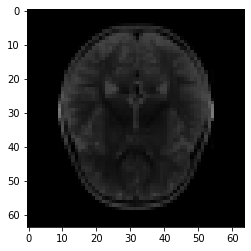

In [116]:
plt.imshow(x_test[0])

In [118]:
x_test[0].shape

(64, 64, 3)

In [119]:
test_img0 = x_test[0].reshape(1, 64, 64, 3)

In [120]:
test_img0.shape

(1, 64, 64, 3)

In [121]:
res = model.predict_on_batch(test_img0)

In [129]:
print(res)

[[9.9999607e-01 3.8802236e-06]]


In [130]:
res[0][0]

0.99999607

In [131]:
res[0][1]

3.8802236e-06

In [132]:
if (res[0][0] > res[0][1]):
    print("NO tumor")
else:
    print("There is a tumor")

NO tumor


In [137]:
def getPredictions(image):
    test_image = image.reshape(1, 64, 64, 3)
    res = model.predict_on_batch(test_image)
    
    #Display the image
    plt.imshow(image)
    
    if (res[0][0] > res[0][1]):
        print("It is NOT a tumor")
    else:
        print("It is a tumor")

It is NOT a tumor


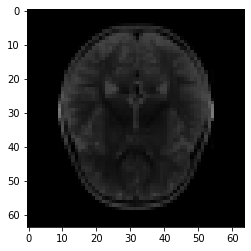

In [138]:
getPredictions(x_test[0])

It is a tumor


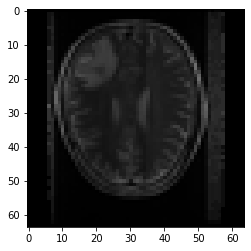

In [139]:
getPredictions(x_test[3])

It is a tumor


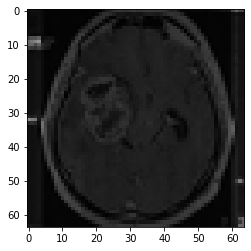

In [141]:
getPredictions(x_test[10])

It is NOT a tumor


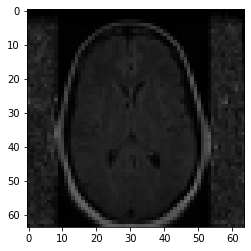

In [144]:
getPredictions(x_test[1])